# Exploratory Data Analysis of Walmart Data (2015)

## Date: 12/30/2017
## Author: Hiro Miyake

# 1. Introduction

This notebook performs some exploratory data analysis on data from the [Walmart Recruiting: Trip Type Classification](https://www.kaggle.com/c/walmart-recruiting-trip-type-classification) competition on Kaggle, held in 2015.

Plotting can be a particularly fruitful way to perform exploratory data analysis. Here are some examples using [matplotlib](https://matplotlib.org/tutorials/introductory/sample_plots.html) and [pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html).

Exploratory data analysis is helpful in guiding model building.

# 2. Initial Setup and loading of the data

First let's import the relevant modules.

In [1]:
%matplotlib inline

#import matplotlib
import matplotlib.pyplot as plt

from collections import Counter

import pandas as pd
import numpy as np
import seaborn as sns

Load the training data into a pandas dataframe.

In [2]:
df = pd.read_csv("train.csv")
## Tips for using SQL in Python
## https://github.com/gjreda/pydata2014nyc/blob/master/demo.ipynb

# 3. Quick summary of the data

Look at the first 5 lines of the data and get a sense of what is in it.

In [3]:
df.head()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
0,999,5,Friday,6.811315e+10,-1,FINANCIAL SERVICES,1000.0
1,30,7,Friday,6.053882e+10,1,SHOES,8931.0
2,30,7,Friday,7.410811e+09,1,PERSONAL CARE,4504.0
3,26,8,Friday,2.238404e+09,2,PAINT AND ACCESSORIES,3565.0
4,26,8,Friday,2.006614e+09,2,PAINT AND ACCESSORIES,1017.0


The variable `TripType` is what we want to predict. The rest are features. However, the main purpose of `VisitNumber` is to act as a label to keep the data organized, so this column is probably not important for model building.

Now let us get some summary statistics and info. The function `info` gives the data type of each column, as well as how many rows there are. The function `describe` gives summary statistics of the quantitative columns. Note it does not give information on qualitative variables.

In [4]:
## http://www.gregreda.com/2013/10/26/working-with-pandas-dataframes/
print df.info()
print df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB
None
            TripType    VisitNumber           Upc      ScanCount  \
count  647054.000000  647054.000000  6.429250e+05  647054.000000   
mean       58.584511   96167.640078  3.060698e+10       1.108878   
std       157.635533   55545.485154  9.120134e+10       0.700776   
min         3.000000       5.000000  8.340000e+02     -12.000000   
25%        27.000000   49268.000000  3.400001e+09       1.000000   
50%        39.000000   97074.000000  7.050103e+09       1.000000   
75%        

Even though most of the columns are quantitative, it is most likely that these are dummy variables for qualitative variables. Let's figure out how many distinct values there are for each of these effectively qualitative variables.

In [5]:
print 'The training data has ' + str(df.shape[0]) + ' columns and ' + str(df.shape[1]) + ' rows'
print 'Total distinct number of TripType outcomes: ' + str(len(set(df["TripType"])))
print 'Total distinct number of VisitNumber variable: ' + str(len(set(df["VisitNumber"])))
print 'Total distinct number of Upc variable: ' + str(len(set(df["Upc"])))
print 'Total distinct number of ScanCount variable: ' + str(len(set(df["ScanCount"])))
print 'Total distinct number of DepartmentDescription variable: ' + str(len(set(df["DepartmentDescription"])))
print 'Total distinct number of FinelineNumber variable: ' + str(len(set(df["FinelineNumber"])))

The training data has 647054 columns and 7 rows
Total distinct number of TripType outcomes: 38
Total distinct number of VisitNumber variable: 95674
Total distinct number of Upc variable: 101843
Total distinct number of ScanCount variable: 39
Total distinct number of DepartmentDescription variable: 69
Total distinct number of FinelineNumber variable: 9324


We see that there are more item types than the number of visits. So using all available `Upc` values will probably lead to over-fitting, not to mention take a really long time to train the data.

# 4. Reduce data by unique `VisitNumber`

Note that there is redundancy in the `TripType`, `VisitNumber`, and `Weekday` columns because for each trip, one can get many items. Obviously, each trip has the same value for the three columns. So let's make a dataframe which contains only unique values of these three variables.

In [6]:
df2 = df[["TripType", "VisitNumber", "Weekday"]].copy()
df2.drop_duplicates(subset = "VisitNumber", inplace = True)
df2.head()

,TripType,VisitNumber,Weekday
0,999,5,Friday
1,30,7,Friday
3,26,8,Friday
26,8,9,Friday
29,8,10,Friday


## 4.1. Look at `TripType` dependent variable

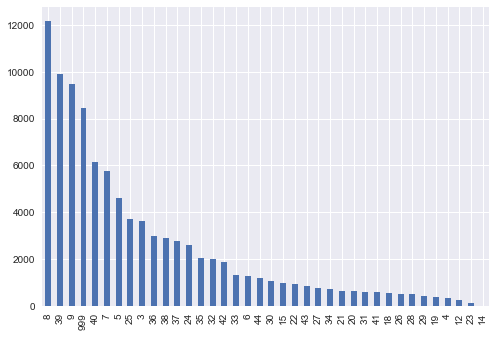

In [7]:
## https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
df2['TripType'].value_counts().plot(kind='bar')

We see that the frequency of `TripType` is not uniform, so that there are values that are more and less frequent than the others.

## 4.2. Look at `Weekday` independent variable

Sunday       17124
Saturday     16904
Friday       15234
Monday       12027
Wednesday    11612
Tuesday      11530
Thursday     11243
Name: Weekday, dtype: int64


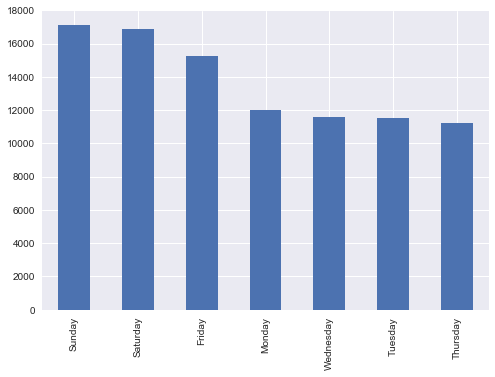

In [8]:
## Subset dataframe on specific TripType values
#df3 = df2[df2["TripType"] == 30]
## https://stackoverflow.com/questions/31029560/plotting-categorical-data-with-pandas-and-matplotlib
#wdvc = df3["Weekday"].value_counts()
#print wdvc
#print isinstance(wdvc, pd.DataFrame)
#print type(wdvc)
#print wdvc.values[0]
#print wdvc.values
#print wdvc.keys()

## The two lines below effectively do the same thing
#print Counter(df2['Weekday'])
print df2['Weekday'].value_counts()

df2['Weekday'].value_counts().plot(kind='bar')

There are more trips on Sunday and Saturday, followed by Friday. The remainder of the days are roughly evenly distributed.

Let's see how the `TripType` variable is distributed among the different days. We can do this using the [`pivot_table`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html) function in pandas. More discussion can be found [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

         VisitNumber                                                        \
TripType         3     4      5      6      7       8       9     12   14    
Weekday                                                                      
Friday         794.0  62.0  751.0  226.0  877.0  1944.0  1565.0  36.0  1.0   
Monday         437.0  51.0  584.0  138.0  799.0  1575.0  1067.0  22.0  1.0   
Saturday       622.0  62.0  742.0  303.0  843.0  1984.0  1765.0  81.0  2.0   
Sunday         451.0  46.0  579.0  184.0  900.0  1989.0  1701.0  74.0  NaN   
Thursday       402.0  40.0  638.0  136.0  746.0  1525.0  1158.0  17.0  NaN   

                  ...                                                       \
TripType    15    ...      36     37     38      39      40     41     42    
Weekday           ...                                                        
Friday    178.0   ...    528.0  419.0  426.0  1488.0   855.0   86.0  287.0   
Monday     90.0   ...    361.0  378.0  412.0  1318.0   769.0   

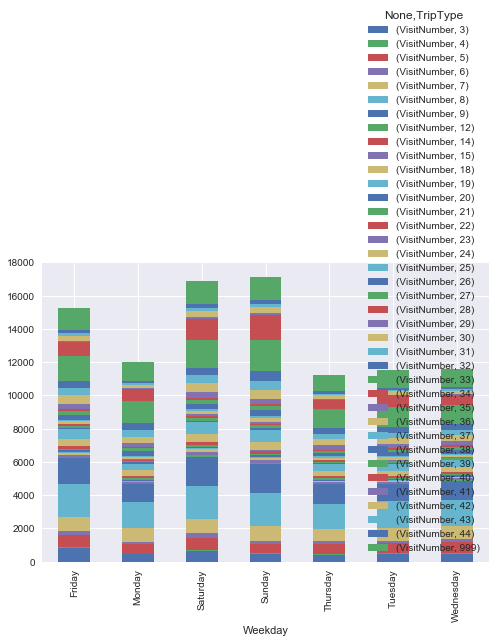

In [9]:
## https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pivot_table.html
df_weekday = pd.pivot_table(df2, index=['Weekday'], columns=['TripType'], aggfunc=lambda x: len(x))
print df_weekday.head()
## Check that the pivot table agrees with previous methods of aggregation.
print df_weekday.sum(axis = 1)
#g = sns.pairplot(df2[['Weekday']], hue = 'TripType')
df_weekday.plot.bar(stacked=True);

There are many `TripType` values so it is a little hard to tell, but all of the days appear to have roughly the same distribution.

# 5. Look at `DepartmentDescription` independent variable

Now let's go back to looking at the full data set and see the distribution of the `DepartmentDescription` variables. Recall that there are 69 unique values.

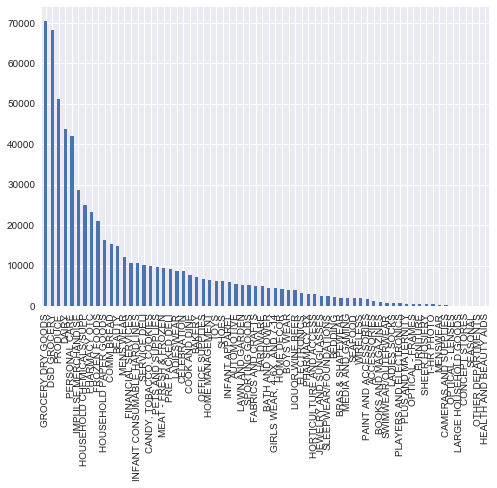

In [10]:
df['DepartmentDescription'].value_counts().plot(kind='bar')

We see that there are values that are much more common than some other ones. Let's see what the most and least common values are.

In [11]:
df["DepartmentDescription"].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

It appears that grocery-related categories appear most frequently.

# 6. Look at `FinelineNumber` independent variable

There are 9324 unique values here.

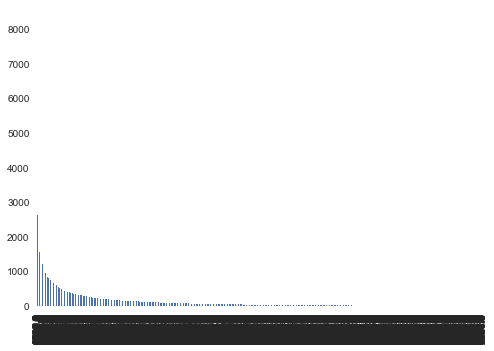

In [12]:
df["FinelineNumber"].value_counts().plot(kind='bar')

In [13]:
df["FinelineNumber"].value_counts()

5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
6213.0       1
2289.0       1
5380.0       1
8539.0       1
7231.0       1
4314.0       1
5578.0       1
8554.0       1
1152.0       1
7773.0       1
8565.0       1
6177.0       1
1765.0       1
5564.0       1
238.0        1
5217.0       1
5218.0       1
3496.0       1
1791.0       1
3492.0       1
7159.0       1
5518.0       1
2861.0       1
6227.0       1
4495.0       1
2311.0       1
524.0        1
7130.0       1
2847.0       1
7313.0       1
Name: FinelineNumber, dtype: int64

There is quite a large range of values. In model building, it would make sense to say keep the top few values.

In [14]:
df_fn = df["FinelineNumber"].value_counts()
thresh = 1000
print df_fn[df_fn > thresh].shape
print df_fn[df_fn > thresh]

(93,)
5501.0    8244
1508.0    5121
135.0     4538
808.0     4401
0.0       3837
9546.0    2997
1407.0    2848
4606.0    2753
115.0     2723
203.0     2639
100.0     2634
3004.0    2607
4010.0    2531
3601.0    2465
3600.0    2455
110.0     2237
3120.0    2074
3555.0    2056
8101.0    2037
5017.0    1980
801.0     1946
7010.0    1935
5620.0    1896
202.0     1895
9100.0    1885
4624.0    1834
3467.0    1751
7955.0    1749
9101.0    1721
3702.0    1655
          ... 
4451.0    1263
4611.0    1256
1853.0    1233
3729.0    1218
8001.0    1206
3502.0    1200
3717.0    1194
707.0     1189
1511.0    1170
4020.0    1169
2500.0    1161
3556.0    1158
601.0     1121
7978.0    1120
3353.0    1119
2112.0    1106
3658.0    1103
1752.0    1092
7962.0    1080
2401.0    1076
55.0      1071
8014.0    1067
5510.0    1062
5010.0    1053
130.0     1043
3559.0    1026
403.0     1025
3707.0    1016
4005.0    1004
8945.0    1001
Name: FinelineNumber, dtype: int64
